# Installing libraries

In [2]:
# Installing geopandas to work with map data
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 72.7 MB/s eta 0:00:00


# Importing libaries

In [3]:
# For data manipulation
import pandas as pd
# For geo data manipulation
import geopandas as gpd
# For matrix manipulation
import numpy as np

# Loading dataset

In [4]:
# Loading voivodeships
voivodeships = gpd.read_file(r"/voivodeships.shp")

# Displaying dataframe
voivodeships

ERROR:fiona._env:Unable to open /voivodeships.shx or /voivodeships.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.


DriverError: ignored

In [ ]:
# Loading district_cities
district_cities = gpd.read_file(r"dane/district_cities/district_cities.shp")

# Displaying dataframe
district_cities

,NAME,LAT,LONG,geometry
0,Aleksandrow Kujawski,52.866600,18.700000,None
1,Augustow,53.850000,23.000000,None
2,Bartoszyce,54.251100,20.809400,None
3,Bedzin,50.333300,19.150000,None
4,Belchatow,51.366667,19.370556,None
...,...,...,...,...
326,Zory,50.050000,18.700000,None
327,Zuromin,53.066600,19.916600,None
328,Zwolen,51.350000,21.600000,None
329,Zyrardow,52.066600,20.433300,None


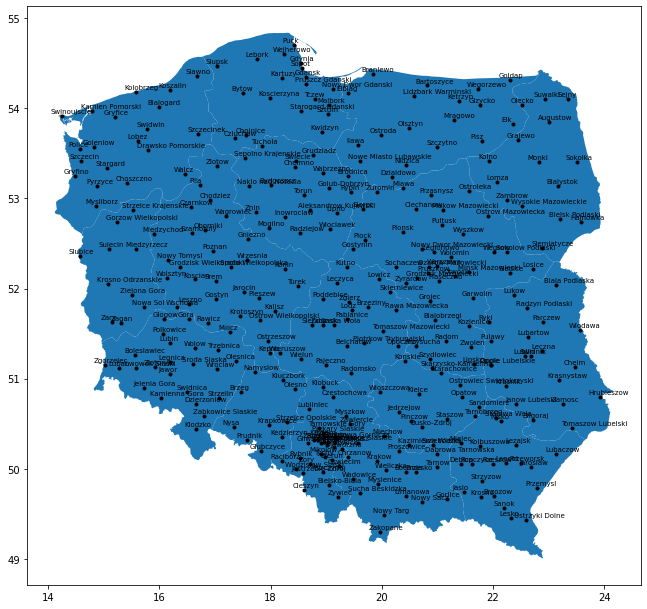

In [ ]:
import matplotlib.pyplot as plt

# Plotting map
voivodeships.plot(figsize=(11, 11))

# Adding cities
plt.scatter(district_cities.LONG, district_cities.LAT, color='black', marker='o', s=9)

# Adding cities names
for i, txt in enumerate(district_cities["NAME"]):
    plt.annotate(txt, (district_cities.LONG[i]-0.2, district_cities.LAT[i]+0.03), fontsize=7)

plt.show()

# Preprocessing

In [ ]:
# Choosing voivodeships
CHOOSEN_VOIVODESHIPS = ["Swietokrzyskie", "Lódzkie", "Mazowieckie"]

In [ ]:
# Adding new column "color"
voivodeships["color"] = np.where(voivodeships["NAME"].isin(CHOOSEN_VOIVODESHIPS), "darkgreen", "lightblue") # royalblue

# Displaying dataframe
voivodeships

,NAME,geometry,color
0,Lódzkie,"POLYGON ((19.34231 52.30919, 19.36254 52.29567...",darkgreen
1,Swietokrzyskie,"POLYGON ((20.70706 51.14639, 20.71060 51.14365...",darkgreen
2,Wielkopolskie,"POLYGON ((16.92182 53.59652, 16.94773 53.58820...",lightblue
3,Kujawsko-Pomorskie,"POLYGON ((18.25566 53.69423, 18.27436 53.67850...",lightblue
4,Malopolskie,"POLYGON ((20.15906 50.43463, 20.17673 50.43217...",lightblue
5,Dolnoslaskie,"POLYGON ((16.16883 51.66089, 16.19236 51.65255...",lightblue
6,Lubelskie,"POLYGON ((23.19990 52.29715, 23.19235 52.28583...",lightblue
7,Lubuskie,"POLYGON ((16.02720 53.10739, 16.03948 53.09146...",lightblue
8,Mazowieckie,"POLYGON ((21.56137 53.37360, 21.56842 53.35785...",darkgreen
9,Opolskie,"POLYGON ((17.79365 51.13264, 17.79803 51.12693...",lightblue


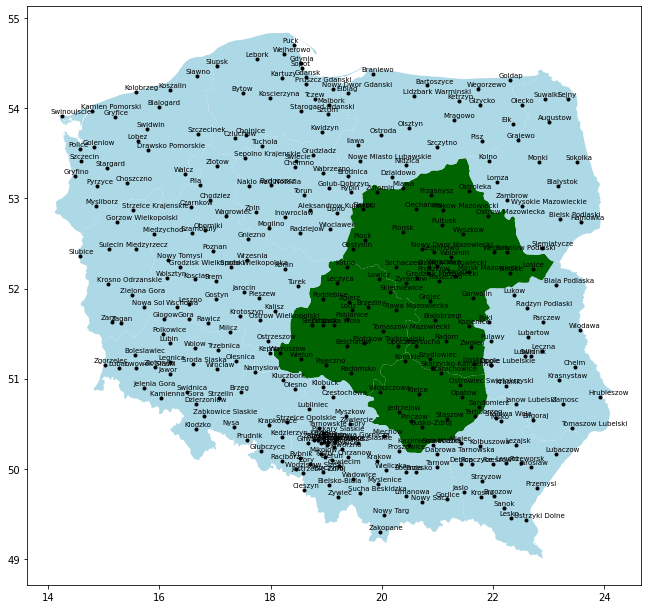

In [ ]:
import matplotlib.pyplot as plt

# Plotting map
voivodeships.plot(figsize=(11, 11), color=voivodeships.color)

# Adding cities
plt.scatter(district_cities.LONG, district_cities.LAT, color='black', marker='o', s=9)

# Adding cities names
for i, txt in enumerate(district_cities["NAME"]):
    plt.annotate(txt, (district_cities.LONG[i]-0.2, district_cities.LAT[i]+0.03), fontsize=7)

plt.show()

### Gething those points that are inside specified regions

In [ ]:
import shapely.geometry

# Creating a list to store the index of selected points
index_selected_points = []

# Iterate over the regions
for region in CHOOSEN_VOIVODESHIPS:
    # Getting map of the region
    region_map = voivodeships[voivodeships.NAME == region].geometry.iloc[0]
    # Setting i to 0
    i = 0
    # Iterating over the rows in the district_cities dataframe
    for _, row in district_cities.iterrows():
        # Creating a Point object from the latitude and longitude
        point = shapely.geometry.Point(row.LONG, row.LAT)
        
        # Checking if the point is contained within the region
        if region_map.contains(point):
            # If it is, append index it to the list
            index_selected_points.append(i)
        
        # incrementing i
        i += 1

# Printing the list of selected points and its size
print(index_selected_points)
print("\nnumber of points inside the region:",len(index_selected_points))

[21, 79, 86, 90, 98, 174, 182, 193, 229, 252, 255, 276, 301, 4, 19, 110, 113, 116, 127, 130, 175, 187, 188, 194, 199, 218, 221, 236, 239, 281, 297, 298, 319, 320, 6, 32, 45, 60, 62, 64, 102, 117, 125, 129, 139, 147, 148, 163, 179, 180, 185, 186, 190, 197, 198, 206, 207, 210, 214, 217, 233, 237, 238, 243, 245, 275, 292, 294, 303, 310, 327, 328, 329]

number of points inside the region: 73


In [ ]:
# Selecting data from a dataframe
cities_coordinates = district_cities.loc[index_selected_points, ['LAT', 'LONG']].to_numpy()

# Selecting names of cities from dataframe
cities_names = district_cities.loc[index_selected_points, ['NAME']].to_numpy()

# Printing first 10 rows of cities_coordinates
cities_coordinates[:10]

array([[50.4666, 20.7166],
       [50.6333, 20.3   ],
       [50.2666, 20.4833],
       [50.8333, 20.6666],
       [51.2   , 20.4166],
       [50.8   , 21.4333],
       [50.9333, 21.4   ],
       [50.5333, 20.5333],
       [50.6833, 21.75  ],
       [51.0666, 21.0666]])

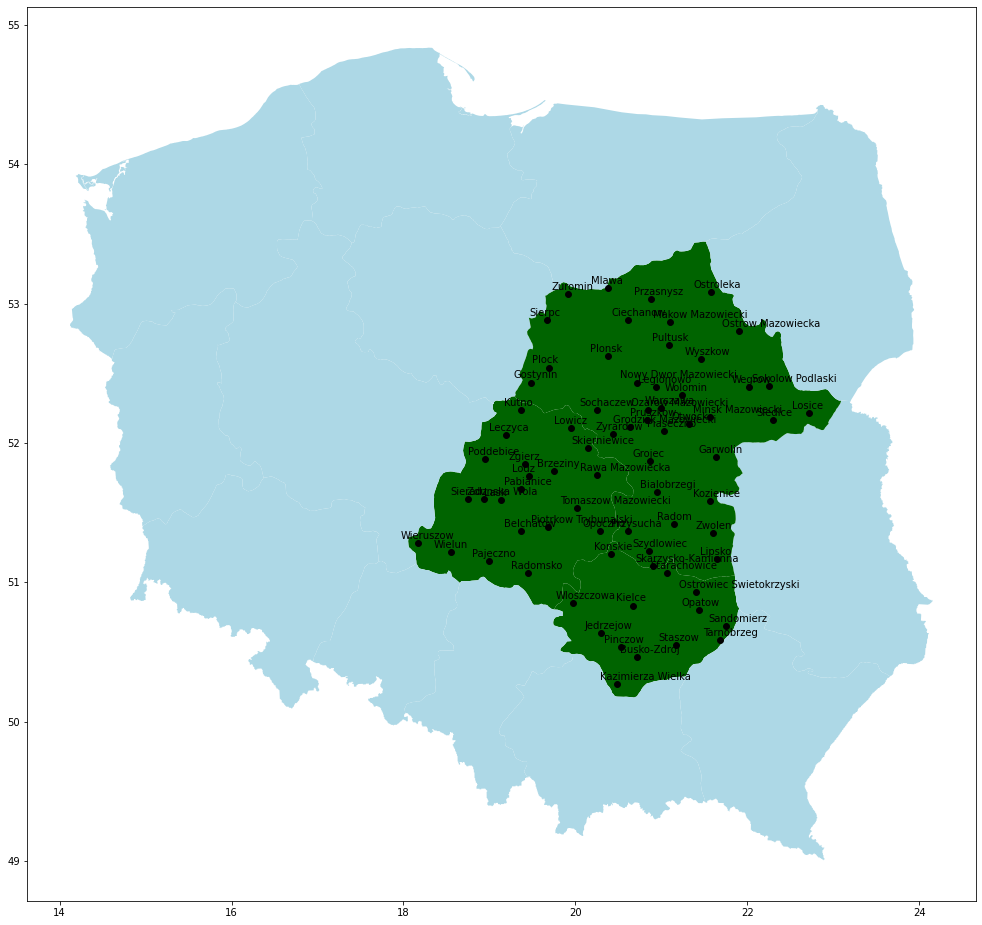

In [ ]:
import matplotlib.pyplot as plt

# Plotting map
voivodeships.plot(figsize=(17, 17), color=voivodeships.color)


# Adding cities
plt.scatter(cities_coordinates[:,1], cities_coordinates[:,0], color='black', marker='o', s=35)

# Adding cities names
for i, txt in enumerate(cities_names):
    plt.annotate(*txt, (cities_coordinates[i,1]-0.2, cities_coordinates[i,0]+0.03), fontsize=10)

plt.show()

# Solving Task

In [ ]:
# Installing TSP solving Algorythms
!pip install python-tsp

### Adding first city to the end of array to create a loop

In [ ]:
# Getting first row
first_city = cities_coordinates[0,:]
first_name = cities_names[0,:]

# Printing first row
first_city

array([50.4666, 20.7166])

In [ ]:
# Adding first_row at the end of cities_coordinates
cities_coordinates = np.vstack((cities_coordinates, first_city))
cities_names = np.vstack((cities_names, first_name))

# Printing coordinates of last city
cities_coordinates[-1]

array([50.4666, 20.7166])

In [ ]:
from python_tsp.distances import great_circle_distance_matrix

# Creating distance matrix containing distance from each point to another
distance_matrix = great_circle_distance_matrix(cities_coordinates)

# Printing distance_matrix and its dimensions
print("matrix dimensions:", distance_matrix.shape,"\n")
print(np.round(distance_matrix[:8,:8]))

matrix dimensions: (74, 74) 

[[     0.  34785.  27720.  40927.  84228.  62685.  70778.  14936.]
 [ 34785.      0.  42791.  34062.  63542.  81912.  84221.  19874.]
 [ 27720.  42791.      0.  64331. 103895.  89588.  98395.  29867.]
 [ 40927.  34062.  64331.      0.  44367.  53990.  52638.  34655.]
 [ 84228.  63542. 103895.  44367.      0.  83904.  74842.  74585.]
 [ 62685.  81912.  89588.  53990.  83904.      0.  15005.  70020.]
 [ 70778.  84221.  98395.  52638.  74842.  15005.      0.  75491.]
 [ 14936.  19874.  29867.  34655.  74585.  70020.  75491.      0.]]


### Checking time complexity of brute force algorythm for solving TSP

In [ ]:
from time import time
from python_tsp.exact import solve_tsp_dynamic_programming

# Creating list for storing time results
times = []

# Loop from 1 to 20
for i in range(1,20):
    # Starting stopwatch
    start = time()
    
    # Slicing matrix to NxN shape and passing it to brute force algorythm
    sliced_matrix = distance_matrix[:i, :i]
    _, _ = solve_tsp_dynamic_programming(sliced_matrix)
    
    # Stoping stopwatch
    end = time()

    # Calculating time algorythm
    seconds = np.round(end - start, 3)
    
    # Printing and appending results
    print(f"matrix {i}x{i} = {seconds} sec")
    times.append(seconds)

matrix 1x1 = 0.0 sec
matrix 2x2 = 0.0 sec
matrix 3x3 = 0.012 sec
matrix 4x4 = 0.0 sec
matrix 5x5 = 0.0 sec
matrix 6x6 = 0.001 sec
matrix 7x7 = 0.003 sec
matrix 8x8 = 0.0 sec
matrix 9x9 = 0.0 sec
matrix 10x10 = 0.018 sec
matrix 11x11 = 0.032 sec
matrix 12x12 = 0.134 sec
matrix 13x13 = 25.713 sec
matrix 14x14 = 0.682 sec
matrix 15x15 = 1.565 sec
matrix 16x16 = 5.252 sec
matrix 17x17 = 11.258 sec
matrix 18x18 = 23.445 sec
matrix 19x19 = 49.023 sec


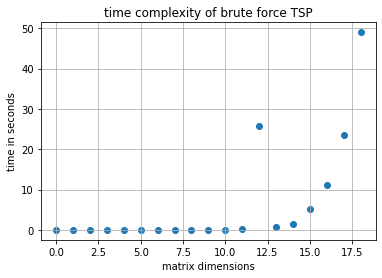

In [ ]:
# Plotting time complexity of brute force algorythm for TSP
plt.title("time complexity of brute force TSP")

plt.scatter(list(range(len(times))), times);

plt.grid()
plt.xlabel("matrix dimensions")
plt.ylabel("time in seconds")

plt.plot();

### Searching for best path using simulated anneling algorythm

In [ ]:
from python_tsp.heuristics import solve_tsp_simulated_annealing

# Using simulated annealing to solve TSP problem
permutation, distance = solve_tsp_simulated_annealing(distance_matrix)
distance

2023623.4353746686

In [ ]:
# Getting best path
best_path = cities_coordinates[permutation]

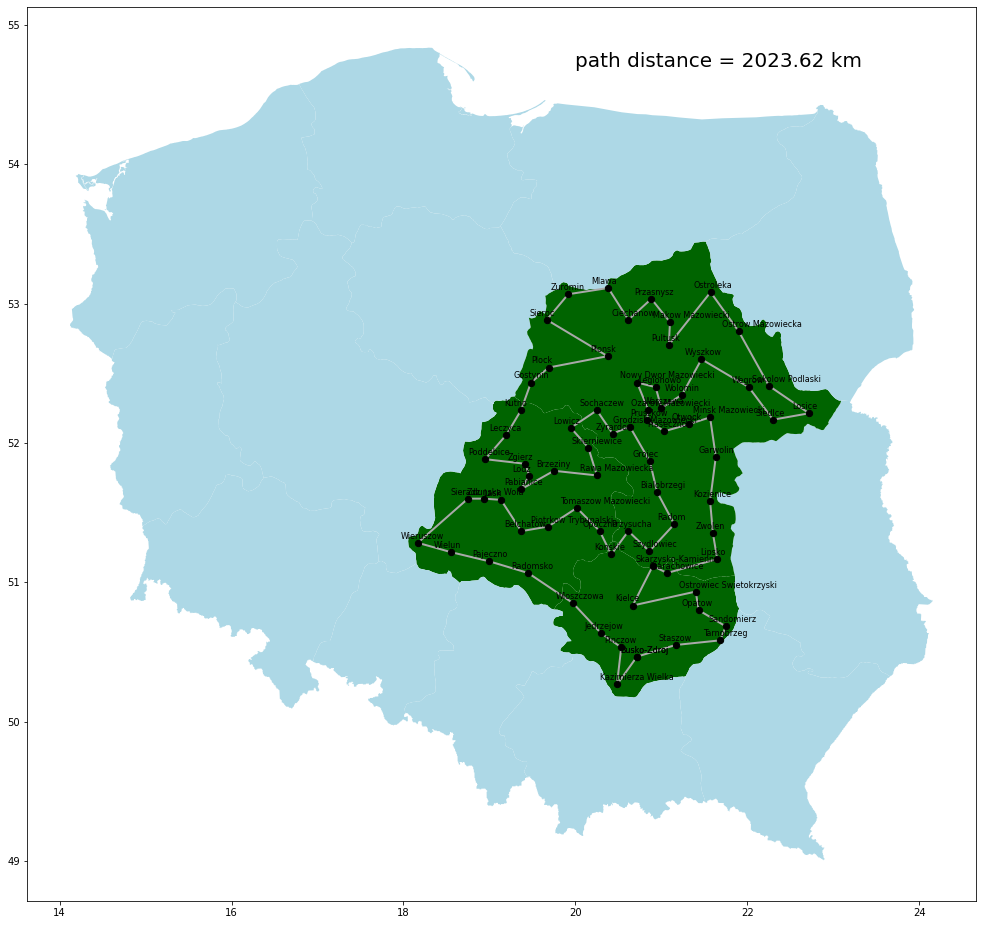

In [ ]:
import matplotlib.pyplot as plt

# Plotting map
voivodeships.plot(figsize=(17, 17), color=voivodeships.color)

# Adding path
plt.plot(best_path[:,1], best_path[:,0], color='darkgrey', lw=2)

# Adding cities
plt.scatter(cities_coordinates[:,1], cities_coordinates[:,0], color='black', marker='o', s=40, zorder=10)

# Adding cities names
for i, txt in enumerate(cities_names):
    plt.annotate(*txt, (cities_coordinates[i,1]-0.2, cities_coordinates[i,0]+0.03), fontsize=8)

# Adding distance of given path 
plt.annotate(f"path distance = {np.round(distance/1000, 2)} km", (20,54.7), fontsize=20, zorder=15)

plt.show()

#### Final path

In [ ]:
cities_names[permutation]

array([['Busko-Zdroj'],
       ['Staszow'],
       ['Tarnobrzeg'],
       ['Sandomierz'],
       ['Opatow'],
       ['Ostrowiec Swietokrzyski'],
       ['Kielce'],
       ['Skarzysko-Kamienna'],
       ['Starachowice'],
       ['Lipsko'],
       ['Zwolen'],
       ['Kozienice'],
       ['Garwolin'],
       ['Minsk Mazowiecki'],
       ['Otwock'],
       ['Piaseczno'],
       ['Pruszkow'],
       ['Ozarow Mazowiecki'],
       ['Nowy Dwor Mazowiecki'],
       ['Legionowo'],
       ['Warszawa'],
       ['Wolomin'],
       ['Wyszkow'],
       ['Wegrow'],
       ['Siedlce'],
       ['Losice'],
       ['Sokolow Podlaski'],
       ['Ostrow Mazowiecka'],
       ['Ostroleka'],
       ['Pultusk'],
       ['Makow Mazowiecki'],
       ['Przasnysz'],
       ['Ciechanow'],
       ['Mlawa'],
       ['Zuromin'],
       ['Sierpc'],
       ['Plonsk'],
       ['Plock'],
       ['Gostynin'],
       ['Kutno'],
       ['Leczyca'],
       ['Poddebice'],
       ['Zgierz'],
       ['Lodz'],
       ['Pabianice'